# <center><font color="red">PRCP-1021-InsCostPred</center>

# PROBLEM STATEMENT

--> This project is about predicting medical expenses in order to determine premiums , to assess the risks and to ensure profitability. Here, predicting medical expenses depend on the factors like age, BMI, smoking habits, gender, dependents and regions.

--> The objective is to analyze the given dataset, uncover patterns and build machine learning models to predict individual charges. This involves addressing the challenges such as the influence of lifestyle, habits, regional differences by preparing the data, identifying key features and evaluating multiple ML models. 

--> The results will contribute to minimizing financial risks, improving risk assessment, determining premiums in the insurance sector and enhancing customer benefits.

# DOMAIN ANALYSIS AND ATTRIBUTES

This project falls under "Health Insurance" domain focusing on predicting individual charges based on the key attributes such as,

1. Age      : Represents the age of an insured person in years.

2. Sex      : Indicates the gender of an insured person, categorized as male or female.

3. BMI      : Provides the Body Mass Index (BMI) of each individual (Ideal BMI ranges from 18.5 to 24.9)

4. Children : Indicates the number of children covered by health insurance.

5. Smoker   : This column will let us know whether an insured person is a smoker or non-smoker.

6. Region   : Includes the geographical regions where the insured person resides, such as Northeast, Northwest, Southeast, and Southwest.

7. Charges  : This is the target column which represents the insurance premium or charges that the insured person is required to pay.

# 1. IMPORTING LIBRARIES

In [69]:
# Importing pandas library for working with datasets
import pandas as pd

# Importing numpy library for working with arrays
import numpy as np

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing seaborn library for visualization
import seaborn as sns

# Importing warnings for disabling warnings from the code
import warnings
warnings.filterwarnings('ignore')

# Importing YData Profiling for generating an automatic exploratory data analysis (EDA) report
from ydata_profiling import ProfileReport

# Importing OneHotEncoder for encoding 
from sklearn.preprocessing import OneHotEncoder

# Importing Label-encoder for encoding 
from sklearn.preprocessing import LabelEncoder

# Importing MinMaxScaler for feature scaling 
from sklearn.preprocessing import MinMaxScaler

# Importing train_test_split for splitting data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

# Importing LinearRegression  
from sklearn.linear_model import LinearRegression

# Importing DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor

# Importing an ensemble model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing an advanced boosting model GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor 

# Importing an efficient and optimized version of gradient- XGBoost (Regression)
from xgboost import XGBRegressor

# Importing KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Importing RandomizedSearchCV for hyperparameter tuning using randomized search
from sklearn.model_selection import RandomizedSearchCV

# Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing Multi-layer Perceptron (MLP) Regressor
from sklearn.neural_network import MLPRegressor

# Importing performance metrics - Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R2_score
from sklearn.metrics import *


# 2. LOADING THE DATA

In [71]:
data = pd.read_csv("Insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 3. BASIC CHECKS

In [73]:
# Visualizing the first 10 rows of the data
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [75]:
# Visualizing the last 10 rows of the data
data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [77]:
# Checking the column names of the data
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [79]:
# Numerical columns of the data
numerical_cols = data.select_dtypes(include=["int","float"]).columns
numerical_cols 

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [81]:
# Categorical columns of the data
categorical_cols = data.select_dtypes(include=["object"]).columns
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [83]:
# Checking the index of the data
data.index

RangeIndex(start=0, stop=1338, step=1)

In [85]:
# Checking the number of rows and columns of the data
data.shape  

(1338, 7)

In [87]:
# Checking the basic information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [89]:
# Checking the statistical information of the numerical column in a data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [91]:
# Checking the statistical information of the categorical column in a data
data.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [93]:
# Checking the unique values for all the columns in the data
for i in data:
    print(f"                                {i.title()}                        ")
    print("\n")
    print(f"* The number of unique values in {i} column :",data[i].nunique())
    print(">>",data[i].unique())
    print('==============================================================================')
    print("\n")

                                Age                        


* The number of unique values in age column : 47
>> [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


                                Sex                        


* The number of unique values in sex column : 2
>> ['female' 'male']


                                Bmi                        


* The number of unique values in bmi column : 548
>> [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5

In [95]:
# Checking the value_counts 
colls = ["children","sex","smoker","region"]
for i in data[colls]:
    print(data[i].value_counts())
    print('============================')
    print("\n")

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




### INSIGHTS
1. There are 1338 rows and 7 columns (4 numerical and 3 categorical) in the dataset.
2. The value count of 'sex' column shows there are 676 males and 662 females.
3. There are 1064 non-smokers and 274 smokers invloved in this dataset.  

# 4. EXPLORATORY DATA ANALYSIS (EDA)

## 4.1. PROFILE REPORT

In [97]:
report = ProfileReport(data, title="EDA")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 4.2. UNIVARIATE ANALYSIS FOR NUMERICAL COLUMN

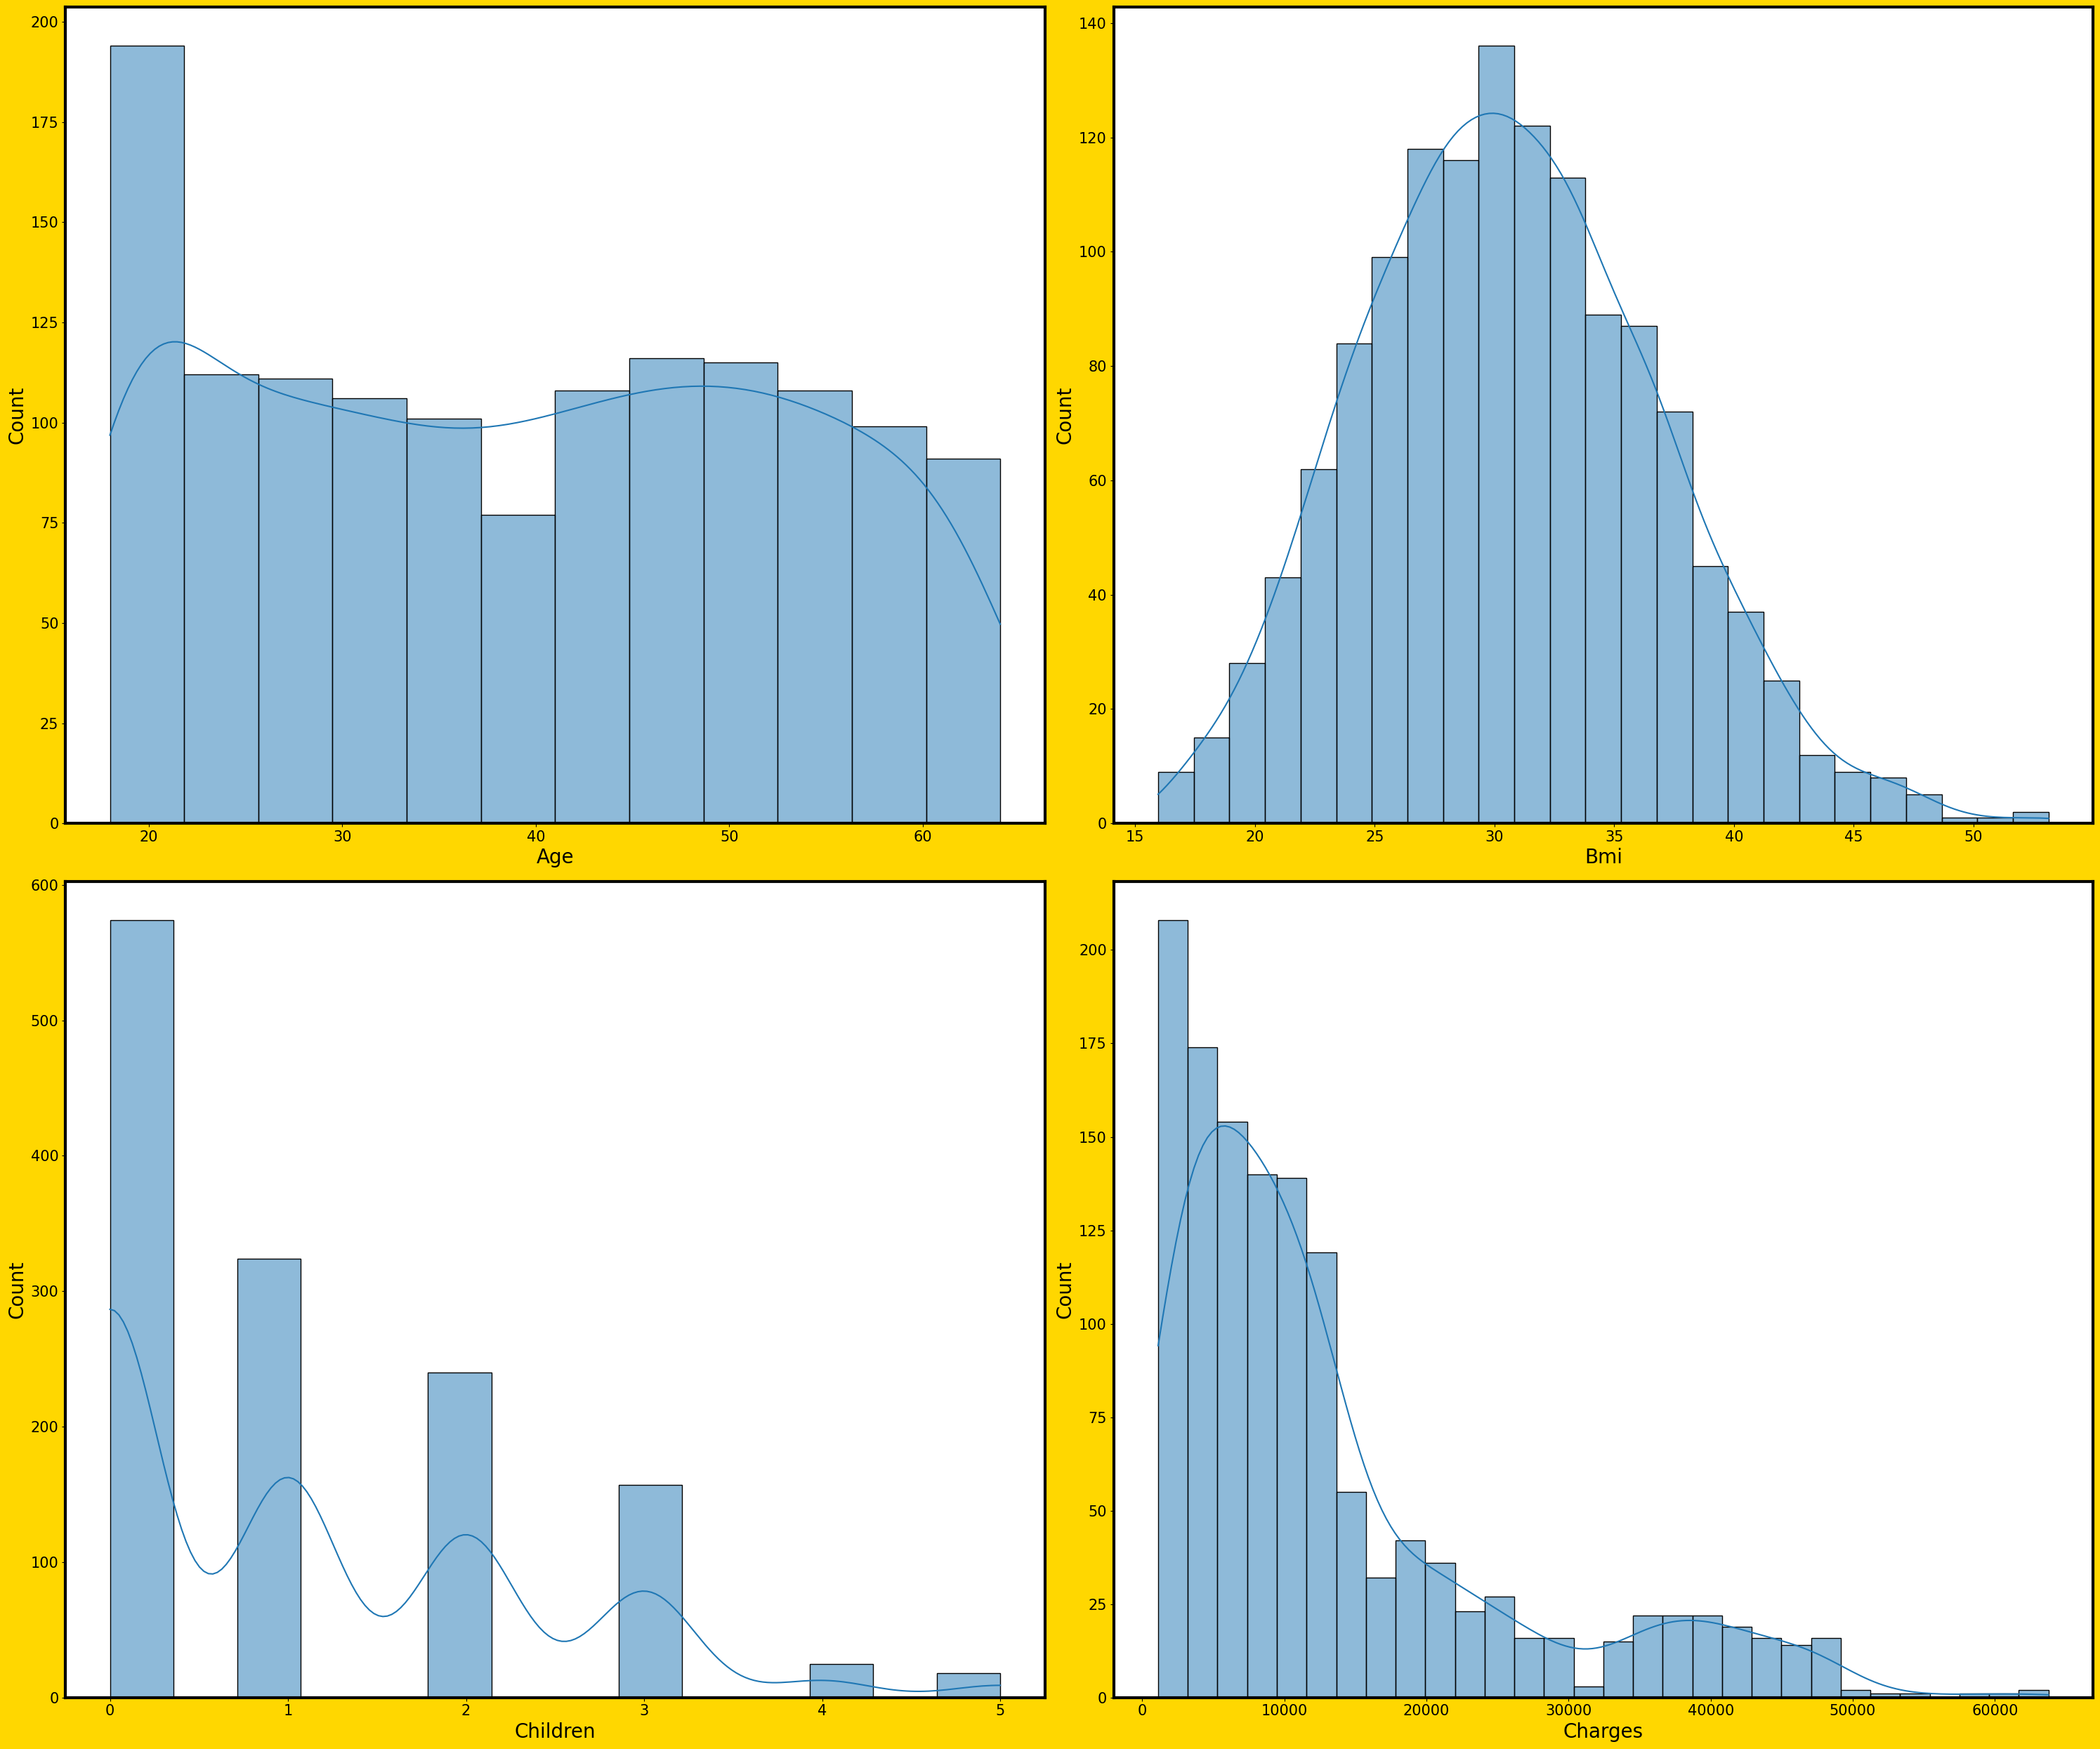

In [99]:

plt.figure(figsize=(30,25),facecolor="gold")
pltnum =1

for i in numerical_cols:
    if pltnum <=4:
        sp = plt.subplot(2,2,pltnum)
        
        sns.histplot(data[i],kde=True)
        
        plt.xlabel(i.title(),fontsize=20)
        plt.ylabel("Count",fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        
        sp.spines['top'].set_linewidth(3)
        sp.spines['bottom'].set_linewidth(3)
        sp.spines['left'].set_linewidth(3)
        sp.spines['right'].set_linewidth(3)
        
    pltnum +=1
    
plt.tight_layout()
plt.show()

        

## 4.3. UNIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS

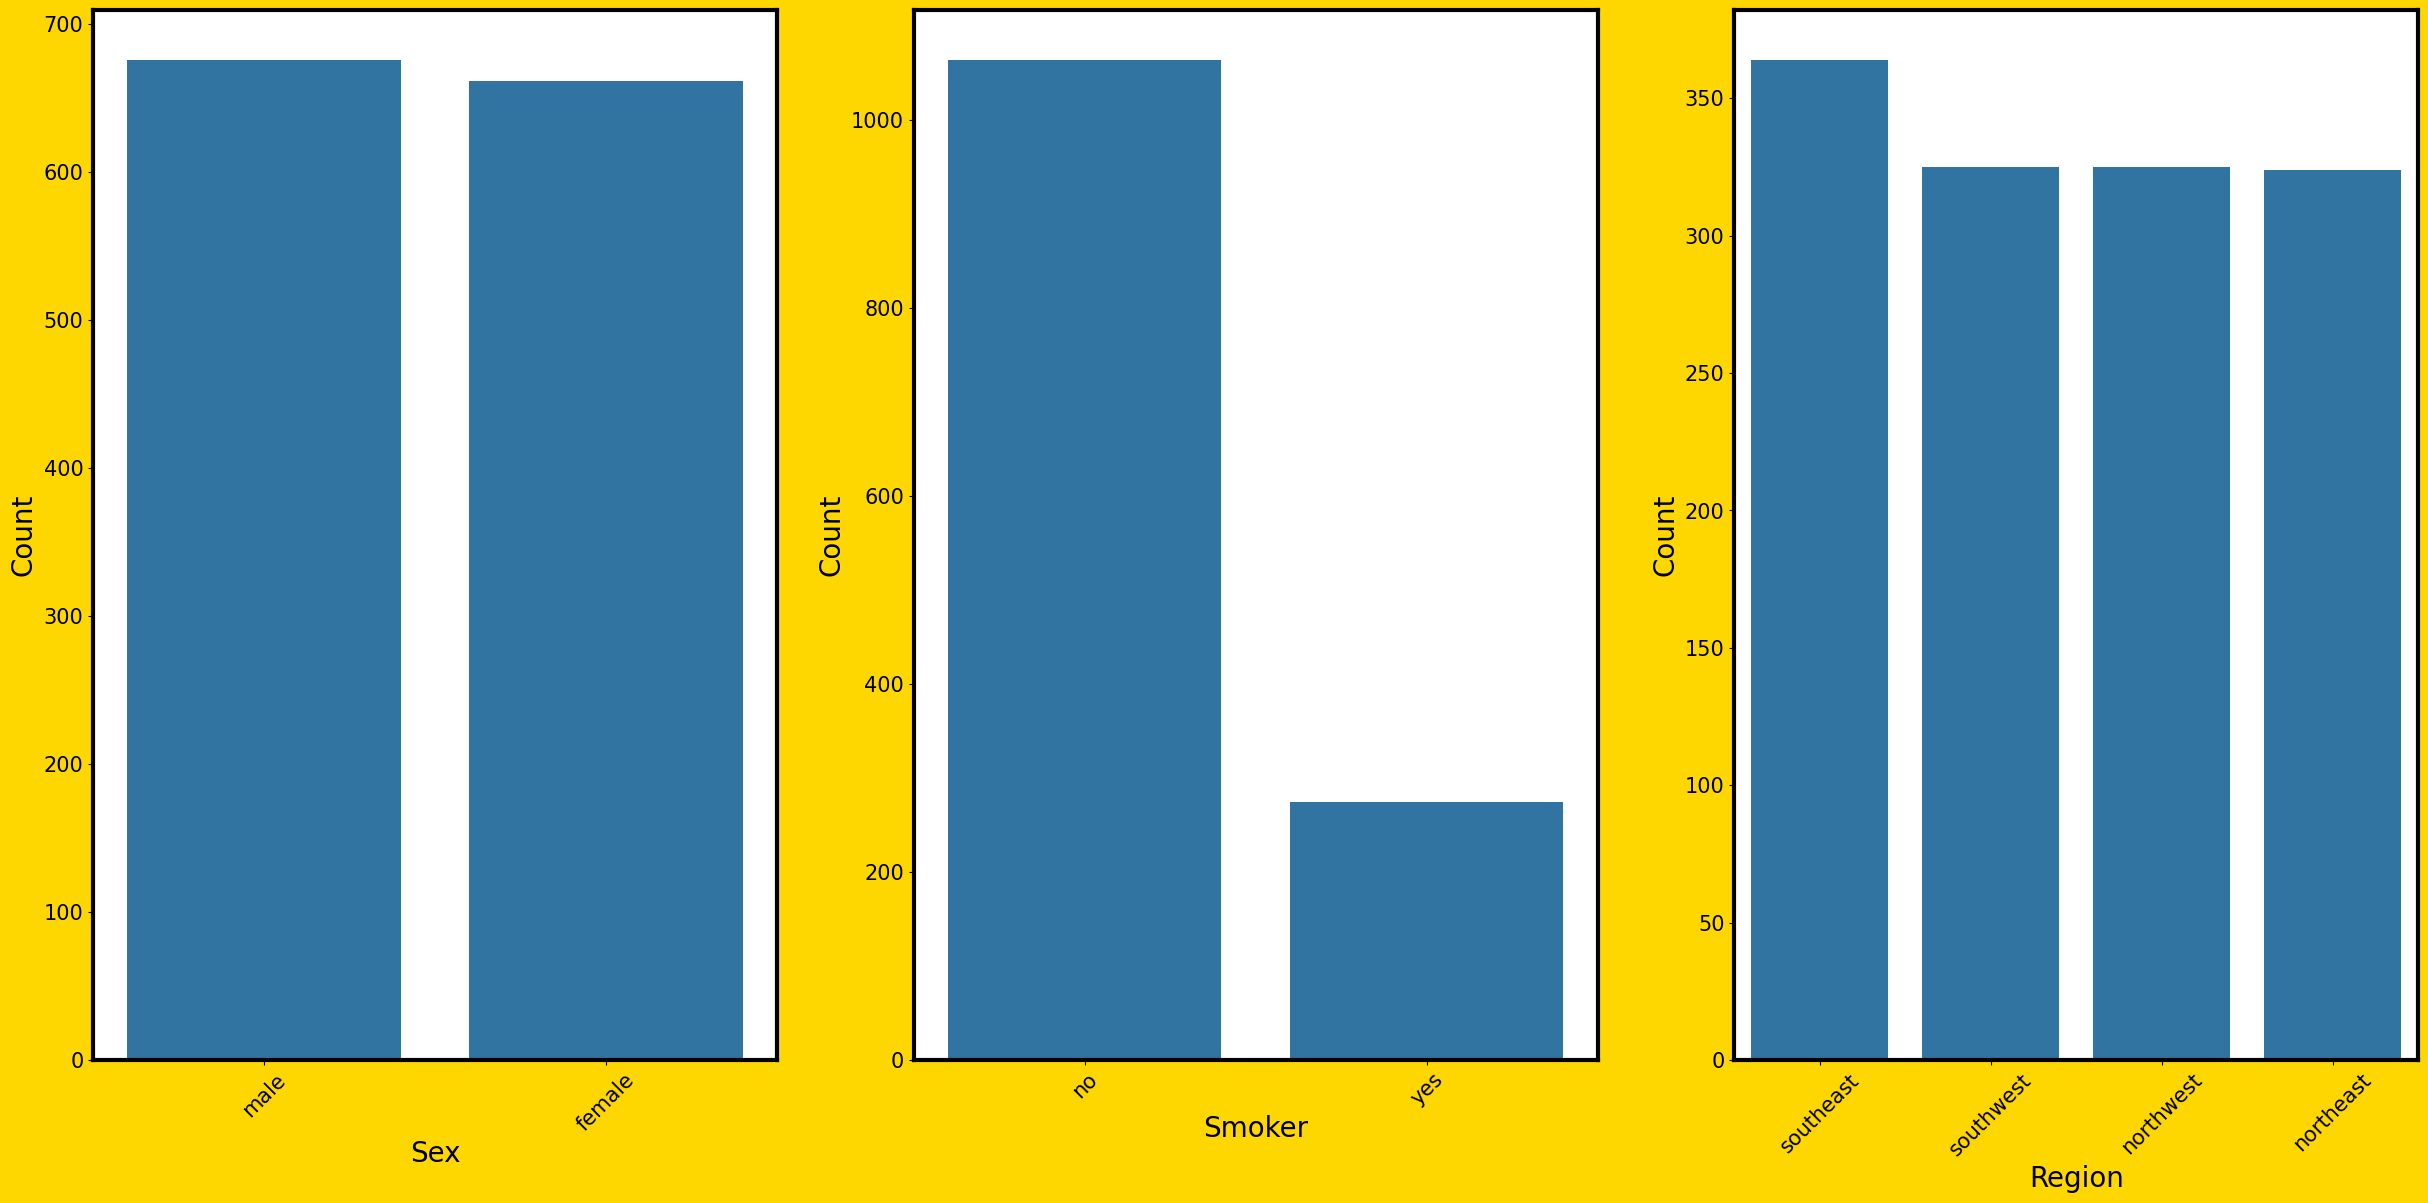

In [101]:
plt.figure(figsize=(30,30),facecolor="gold")

plttnum=1

for i in categorical_cols:
    if plttnum <= 3:  
        sp = plt.subplot(2, 3, plttnum)  
        
        sns.barplot(x=data[i].value_counts().index, y=data[i].value_counts().values)
        
        plt.xlabel(i.title(), fontsize=20)
        plt.ylabel("Count", fontsize=20)
        plt.xticks(rotation=45, fontsize=15)  
        plt.yticks(fontsize=15)  
        
        sp.spines['top'].set_linewidth(3)
        sp.spines['bottom'].set_linewidth(3)
        sp.spines['left'].set_linewidth(3)
        sp.spines['right'].set_linewidth(3)

    plttnum += 1  

  
plt.show()  

## 4.4. BIVARIATE ANALYSIS

In [103]:
# Age vs Charges
plt.figure(figsize=(100,80))

sns.barplot(data,x="age",y="charges")

plt.xlabel("Age",fontsize=70)
plt.ylabel("Charges",fontsize=70)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.show()

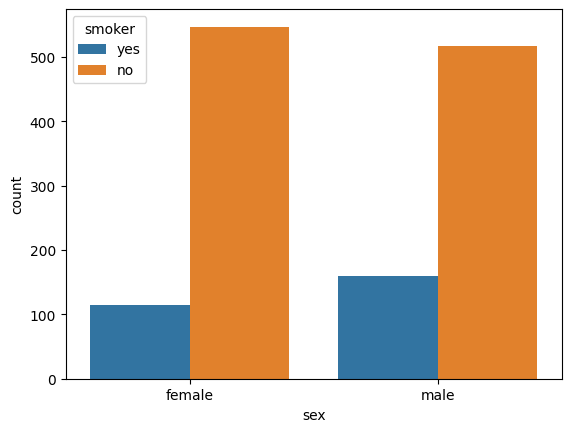

In [105]:
# Visualizing the number of smokers in each gender
sns.countplot(x='sex',hue='smoker',data=data)
plt.show()

In [107]:
# Number of female smokers in the dataset- 115
len(data[(data["sex"]=="female") & (data["smoker"]=="yes")])

115

In [109]:
# Number of male smokers in the dataset - 159
len(data[(data["sex"]=="male") & (data["smoker"]=="yes")])

159

In [111]:
# The highest charge value in the target column -  63770.42801
data["charges"].max()

63770.42801

In [113]:
# The lowest charge value in the target column -  1121.8739
data["charges"].min()

1121.8739

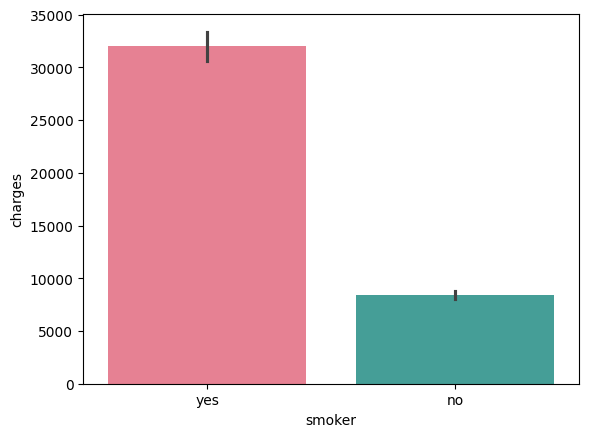

In [115]:
# smoker vs charges
sns.barplot(data,x="smoker",y="charges",palette="husl")
plt.show()

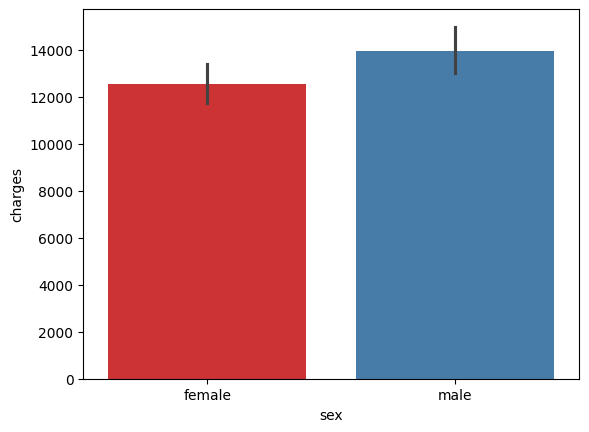

In [117]:
# sex vs charges
sns.barplot(data,x="sex",y="charges",palette="Set1")
plt.show()

## 4.5. MULTIVARIATE ANALYSIS

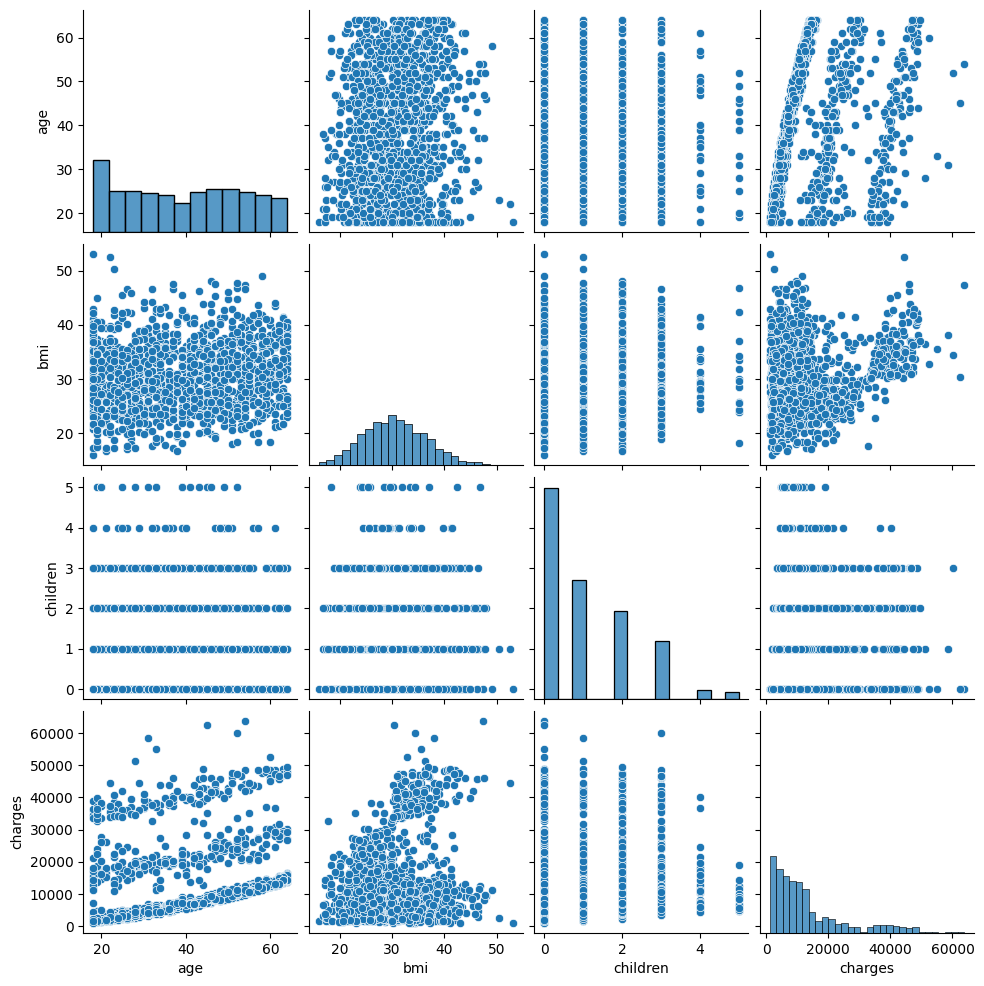

In [119]:

sns.pairplot(data)
plt.show()

### INSIGHTS FROM EDA
1. There are 91 individuals with a BMI over 40, classified as Obesity Class 3 (Extremely Obese), putting them at a higher risk of developing conditions such as Type 2 diabetes, hypertension, and heart disease. Due to their increased likelihood of requiring medical expense support earlier than others, the company can adjust premiums accordingly to maintain profitability

2. The dataset consists of 20.5% smokers and 79.5% non-smokers, indicating that the number of non-smokers is significantly higher than that of smokers

3.  The 'age' column is highly correlated with 'charges', meaning that as age increases, medical charges also tend to increase

4.  There are 159 male smokers and 115 female smokers in the dataset, indicating that the number of male smokers is higher than that of female smokers

5. The highest insurance charge in the dataset is 63,770.42801, while the lowest is 1,121.8739

6. There is a significant correlation between smoking and medical charges, indicating that smokers tend to have higher medical expenses due to increased health risks

# 5. DATA PREPROCESSING

## 5.1. NULL VALUES CHECKING

In [121]:
data.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 5.2. DUPLICATE VALUES CHECKING

In [123]:
data.duplicated().sum()

1

In [125]:
dup = data[data.duplicated(keep=False)]
dup                  
# rows located in the index of 195 and 581 are duplicated

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [127]:
# Dropping the duplicates
data.drop_duplicates(inplace=True)

In [129]:
# Verification
data.duplicated().sum()

0

In [131]:
data.shape # One duplicate removed out of 1338

(1337, 7)

## 5.3. CHECK FOR CORRUPTED VALUES

#### AGE

In [133]:
data[data["age"]==0]

,age,sex,bmi,children,smoker,region,charges


#### BMI

In [135]:
data[data["bmi"]==0]

,age,sex,bmi,children,smoker,region,charges


#### CHARGES

In [137]:
data[data["charges"]==0]

,age,sex,bmi,children,smoker,region,charges


In [139]:
# Check for negative values in numerical columns
for i in numerical_cols:

    negative=data[data[i]<0]

    if negative.empty:
        print(f'{i}: There is no negative values in this column')
    else:
        print(negative)

age: There is no negative values in this column
bmi: There is no negative values in this column
children: There is no negative values in this column
charges: There is no negative values in this column


#### Insights
1. There are no null values present in this dataset

2. There is only one duplicate row in the dataset and has been removed successfully

3. The 'age', 'bmi', 'charges' columns doesn't have the value '0'
   
4. The 'age', 'bmi', 'charges' and 'children' doesn't have any negative values

Therefore, Points 3.& 4. infers  that there are no corrupted values in the dataset

## 5.4. ENCODING CATEGORICAL COLUMNS

### 5.4.1. ONE HOT ENCODING

#### SEX

In [142]:
# Initializing OneHotEncoder
ohe_sex = OneHotEncoder()

In [144]:
# Fitting and transforming the "Sex" column
sex_encoded = ohe_sex.fit_transform(data[['sex']]).toarray()
sex_encoded

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [146]:
# Getting OneHotEncoder output features names
ohe_sex.get_feature_names_out()

array(['sex_female', 'sex_male'], dtype=object)

In [148]:
# Creating a DataFrame of encoded array
sex_encoded_df = pd.DataFrame(sex_encoded.astype(int), index=data.index, columns=['sex_female', 'sex_male'])
sex_encoded_df

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [150]:
# Dropping first column from sex_encoded_df
sex_encoded_df.drop('sex_female',axis=1,inplace=True)

In [152]:
sex_encoded_df

,sex_male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [154]:
# Concatenating "sex_encoded_df" to the original dataframe
data = pd.concat([sex_encoded_df,data],axis=1)

In [156]:
data

,sex_male,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,1,28,male,33.000,3,no,southeast,4449.46200
3,1,33,male,22.705,0,no,northwest,21984.47061
4,1,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1,50,male,30.970,3,no,northwest,10600.54830
1334,0,18,female,31.920,0,no,northeast,2205.98080
1335,0,18,female,36.850,0,no,southeast,1629.83350
1336,0,21,female,25.800,0,no,southwest,2007.94500


In [158]:
# Removing the 'Sex' column from the data
data.drop("sex",axis=1,inplace=True)

In [160]:
data

,sex_male,age,bmi,children,smoker,region,charges
0,0,19,27.900,0,yes,southwest,16884.92400
1,1,18,33.770,1,no,southeast,1725.55230
2,1,28,33.000,3,no,southeast,4449.46200
3,1,33,22.705,0,no,northwest,21984.47061
4,1,32,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,1,50,30.970,3,no,northwest,10600.54830
1334,0,18,31.920,0,no,northeast,2205.98080
1335,0,18,36.850,0,no,southeast,1629.83350
1336,0,21,25.800,0,no,southwest,2007.94500


#### REGION

In [162]:
# Initializing OneHotEncoder
ohe_region = OneHotEncoder()

In [164]:
# Fit and transform of "Region" column
region_encoded = ohe_region.fit_transform(data[["region"]]).toarray()
region_encoded

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [166]:
# Get OneHotEncoder output features names
ohe_region.get_feature_names_out()

array(['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [168]:
# Creating a DataFrame of encoded array
region_encoded_df = pd.DataFrame(region_encoded.astype(int), index=data.index, columns=['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'])
region_encoded_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [170]:
# Dropping first column from region_encoded_df
region_encoded_df.drop('region_northeast',axis=1,inplace=True)

In [172]:
region_encoded_df

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [174]:
# Concatenating "region_encoded_df" to the original dataframe
data = pd.concat([region_encoded_df,data],axis=1)

In [176]:
data

,region_northwest,region_southeast,region_southwest,sex_male,age,bmi,children,smoker,region,charges
0,0,0,1,0,19,27.900,0,yes,southwest,16884.92400
1,0,1,0,1,18,33.770,1,no,southeast,1725.55230
2,0,1,0,1,28,33.000,3,no,southeast,4449.46200
3,1,0,0,1,33,22.705,0,no,northwest,21984.47061
4,1,0,0,1,32,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,1,0,0,1,50,30.970,3,no,northwest,10600.54830
1334,0,0,0,0,18,31.920,0,no,northeast,2205.98080
1335,0,1,0,0,18,36.850,0,no,southeast,1629.83350
1336,0,0,1,0,21,25.800,0,no,southwest,2007.94500


In [178]:
# Removing the 'Region' column from the data
data.drop("region",axis=1,inplace=True)

In [180]:
data

,region_northwest,region_southeast,region_southwest,sex_male,age,bmi,children,smoker,charges
0,0,0,1,0,19,27.900,0,yes,16884.92400
1,0,1,0,1,18,33.770,1,no,1725.55230
2,0,1,0,1,28,33.000,3,no,4449.46200
3,1,0,0,1,33,22.705,0,no,21984.47061
4,1,0,0,1,32,28.880,0,no,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,1,0,0,1,50,30.970,3,no,10600.54830
1334,0,0,0,0,18,31.920,0,no,2205.98080
1335,0,1,0,0,18,36.850,0,no,1629.83350
1336,0,0,1,0,21,25.800,0,no,2007.94500


### 5.4.2 LABEL ENCODING

#### SMOKER

In [182]:
# Initializing LabelEncoder
le_smoker = LabelEncoder()

In [184]:
# Fitting and transforming the 'Smoker' column
data["smoker"] = le_smoker.fit_transform(data["smoker"])

In [186]:
data

,region_northwest,region_southeast,region_southwest,sex_male,age,bmi,children,smoker,charges
0,0,0,1,0,19,27.900,0,1,16884.92400
1,0,1,0,1,18,33.770,1,0,1725.55230
2,0,1,0,1,28,33.000,3,0,4449.46200
3,1,0,0,1,33,22.705,0,0,21984.47061
4,1,0,0,1,32,28.880,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,1,0,0,1,50,30.970,3,0,10600.54830
1334,0,0,0,0,18,31.920,0,0,2205.98080
1335,0,1,0,0,18,36.850,0,0,1629.83350
1336,0,0,1,0,21,25.800,0,0,2007.94500


## 5.5. SCALING FOR NUMERICAL COLUMNS

In [61]:
# Using MinmaxScaler

In [188]:
min_max = MinMaxScaler()

In [190]:
data[numerical_cols] = min_max.fit_transform(data[numerical_cols])

In [192]:
data

,region_northwest,region_southeast,region_southwest,sex_male,age,bmi,children,smoker,charges
0,0,0,1,0,0.021739,0.321227,0.0,1,0.251611
1,0,1,0,1,0.000000,0.479150,0.2,0,0.009636
2,0,1,0,1,0.217391,0.458434,0.6,0,0.053115
3,1,0,0,1,0.326087,0.181464,0.0,0,0.333010
4,1,0,0,1,0.304348,0.347592,0.0,0,0.043816
...,...,...,...,...,...,...,...,...,...
1333,1,0,0,1,0.695652,0.403820,0.6,0,0.151299
1334,0,0,0,0,0.000000,0.429379,0.0,0,0.017305
1335,0,1,0,0,0.000000,0.562012,0.0,0,0.008108
1336,0,0,1,0,0.065217,0.264730,0.0,0,0.014144


## 5.6. CORRELATION

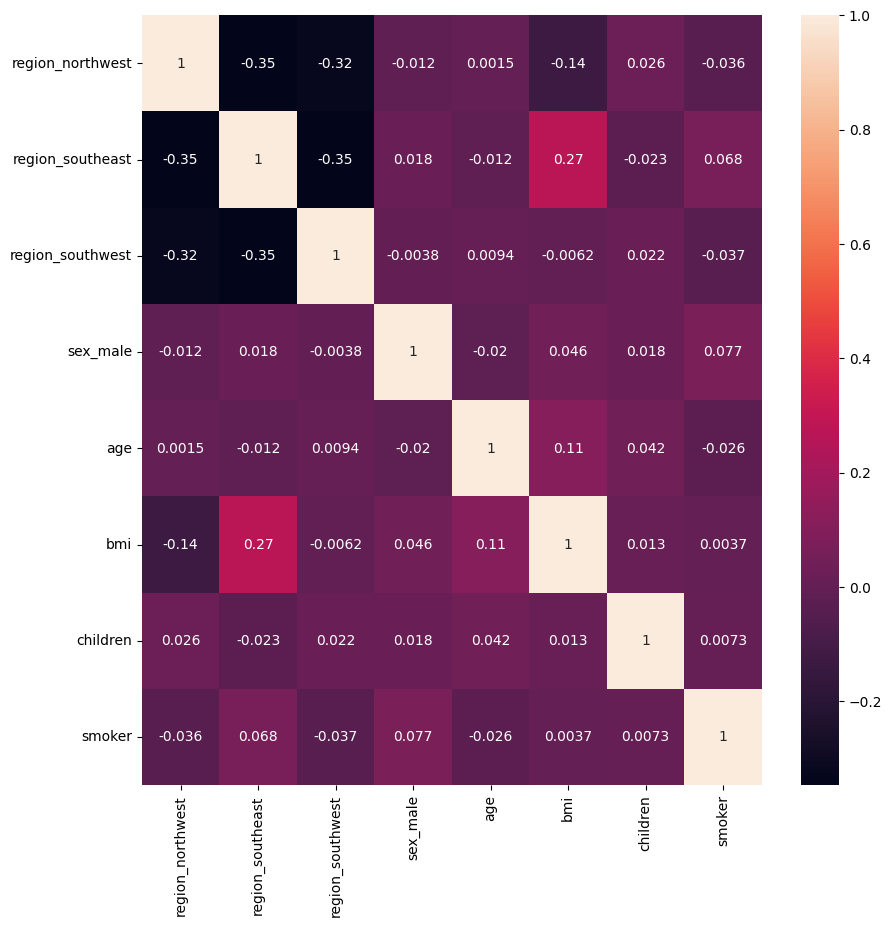

In [194]:
# Check for correlation to avoid multicollinearity
plt.figure(figsize=(10,10))
sns.heatmap(data=data.iloc[:,:-1].corr(),annot=True)
plt.show()

In [196]:
data.iloc[:,:-1].corr()

,region_northwest,region_southeast,region_southwest,sex_male,age,bmi,children,smoker
region_northwest,1.000000,-0.345909,-0.320493,-0.012482,0.001495,-0.136138,0.026044,-0.036321
region_southeast,-0.345909,1.000000,-0.346614,0.017578,-0.012311,0.270057,-0.023492,0.068282
region_southwest,-0.320493,-0.346614,1.000000,-0.003767,0.009415,-0.006211,0.021538,-0.037168
sex_male,-0.012482,0.017578,-0.003767,1.000000,-0.019814,0.046397,0.017848,0.076596
age,0.001495,-0.012311,0.009415,-0.019814,1.000000,0.109344,0.041536,-0.025587
bmi,-0.136138,0.270057,-0.006211,0.046397,0.109344,1.000000,0.012755,0.003746
children,0.026044,-0.023492,0.021538,0.017848,0.041536,0.012755,1.000000,0.007331
smoker,-0.036321,0.068282,-0.037168,0.076596,-0.025587,0.003746,0.007331,1.000000


# 6. DATA SPLITTING

In [230]:
x = data.iloc[:,:-1] # Independent variables
x

,region_northwest,region_southeast,region_southwest,sex_male,age,bmi,children,smoker
0,0,0,1,0,0.021739,0.321227,0.0,1
1,0,1,0,1,0.000000,0.479150,0.2,0
2,0,1,0,1,0.217391,0.458434,0.6,0
3,1,0,0,1,0.326087,0.181464,0.0,0
4,1,0,0,1,0.304348,0.347592,0.0,0
...,...,...,...,...,...,...,...,...
1333,1,0,0,1,0.695652,0.403820,0.6,0
1334,0,0,0,0,0.000000,0.429379,0.0,0
1335,0,1,0,0,0.000000,0.562012,0.0,0
1336,0,0,1,0,0.065217,0.264730,0.0,0


In [232]:
y = data.iloc[:,-1] # Target variable
y

0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1337, dtype: float64

In [234]:
# train_test_split for splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 11)

In [236]:
x_train.shape

(1069, 8)

In [238]:
x_test.shape

(268, 8)

In [240]:
y_train.shape

(1069,)

In [242]:
y_test.shape

(268,)

# 7. MODEL CREATION

## 7.1. LINEAR REGRESSION

In [244]:
lr_model = LinearRegression() 

In [248]:
lr_model.fit(x_train, y_train) 

LinearRegression()

In [250]:
y_pred_linear = lr_model.predict(x_test)
y_pred_linear

array([ 0.43307651,  0.06485189,  0.15529651,  0.00325287,  0.18265638,
        0.15950923,  0.10594521,  0.23201013,  0.21238288,  0.22242137,
        0.10958839,  0.22910189,  0.04412948,  0.01613748,  0.08706258,
        0.55079696,  0.04034759,  0.1136747 ,  0.11212339,  0.18890999,
        0.15881654,  0.03305363,  0.0317627 ,  0.04692156,  0.04919854,
        0.22864428,  0.07036419,  0.11840696,  0.40755256,  0.03118554,
        0.51768944,  0.0087606 ,  0.01767745, -0.02274578,  0.57102328,
        0.49293264,  0.0749543 ,  0.40794263,  0.11159944,  0.12606644,
        0.08026446,  0.19343267,  0.41580639, -0.00209118,  0.12516938,
        0.16204242,  0.18030471,  0.02992358,  0.12902902,  0.41151532,
        0.19552163,  0.45114212,  0.22713368,  0.03670732,  0.17611673,
        0.02759561,  0.04478799,  0.11396797,  0.51336184,  0.07033212,
        0.13529423,  0.19366186,  0.10416806,  0.22639027,  0.06843883,
        0.10504687,  0.17891029,  0.41876246,  0.18517551,  0.00

In [252]:
linear_reg_r2 = r2_score(y_test, y_pred_linear)
print(f'r2_score (Linear Regression) : {linear_reg_r2}')

r2_score (Linear Regression) : 0.8141312870011561


## 7.2. DECISION TREE

In [254]:
DTR=DecisionTreeRegressor()
model=DTR.fit(x_train,y_train)
model

DecisionTreeRegressor()

In [256]:
y_pred_dtr=model.predict(x_test)
print(f'R2_score (Decision Tree) : {r2_score(y_test,y_pred_dtr)}')
print(f'mean_squared_error       : {mean_squared_error(y_test,y_pred_dtr)}')
print(f'mean_absolute_error      : {mean_absolute_error(y_test,y_pred_dtr)}')
print(f'root_mean_square_error   : {np.sqrt(mean_squared_error(y_test,y_pred_dtr))}')

R2_score (Decision Tree) : 0.6745659607323313
mean_squared_error       : 0.01087056855576061
mean_absolute_error      : 0.05110054903313369
root_mean_square_error   : 0.10426201875928075


### 7.2.1. HYPERPARAMETER TUNING (DECISION TREE)

In [545]:
params={'splitter':["best", "random"],
        'criterion':["squared_error", "absolute_error"],
        'max_depth':list(range(1,20)),
        'min_samples_split':list(range(1,10)),
        'min_samples_leaf':list(range(1,10))}

tree_reg=DecisionTreeRegressor()
tree_cv=RandomizedSearchCV(tree_reg,param_distributions=params,scoring='r2',n_jobs=-1,verbose=3,cv=3,n_iter=300)
tree_cv.fit(x_train,y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'splitter': ['best', 'random']},
                   scoring='r2', verbose=3)

In [547]:
best_params=tree_cv.best_params_
print(f'best parameters:{best_params}')

best parameters:{'splitter': 'best', 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_depth': 14, 'criterion': 'absolute_error'}


In [568]:
dt=DecisionTreeRegressor(splitter='best', min_samples_split=9, min_samples_leaf=4, max_depth=14, criterion='absolute_error')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
decisiontree_reg_r2=r2_score(y_test,y_pred)
print(f'r2_score (decision tree):{decisiontree_reg_r2}')

r2_score (decision tree):0.8907349497503316


## 7.3. RANDOM FOREST

In [264]:
RFR=RandomForestRegressor()

In [266]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [268]:
y_pred_rfr=RFR.predict(x_test)

In [270]:
print(f'r2_score (random forest) : {r2_score(y_test,y_pred_rfr)}')
print(f'mean_squared_error       : {mean_squared_error(y_test,y_pred_rfr)}')
print(f'mean_absolute_error      : {mean_absolute_error(y_test,y_pred_rfr)}')
print(f'root_mean_squared_error  : {np.sqrt(mean_squared_error(y_test,y_pred_rfr))}')

r2_score (random forest) : 0.8872972848128171
mean_squared_error       : 0.0037646418138053386
mean_absolute_error      : 0.03742969955875952
root_mean_squared_error  : 0.061356677010781305


### 7.3.1. HYPERPARAMETER TUNING (RANDOM FOREST)

In [355]:
params={'n_estimators':[100,150,200,250,300],
        'max_features':['auto','sqrt','log2'],
        'max_depth':list(range(1,20)),
        'min_samples_split':list(range(1,10)),
        'min_samples_leaf':list(range(1,10)),
        'criterion': ['squared_error',"friedman_mse", "absolute_error","poisson"]}

rf_cv=RandomizedSearchCV(RFR,param_distributions=params,scoring='r2',n_jobs=-1,verbose=3,cv=5,n_iter=300)
rf_cv.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   scoring='r2', verbose=3)

In [357]:
best_params=rf_cv.best_params_
print(f'best parameters:{best_params}')

best parameters:{'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'absolute_error'}


In [387]:
rf_best=RandomForestRegressor(n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features='log2', max_depth=10, criterion='absolute_error')
rf_best.fit(x_train,y_train)
y_pred_rfr_best=rf_best.predict(x_test)
randomforest_reg_r2=r2_score(y_test,y_pred_rfr_best)
print(randomforest_reg_r2)

0.918809734008581


## 7.4. GRADIENT BOOSTING

In [393]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_pred_gbr=GBR.predict(x_test)
print(f' r2_score(gradient boosting) : {r2_score(y_test,y_pred_gbr)}')
print(f' mean_absolute_error         : {mean_absolute_error(y_test,y_pred_gbr)}')
print(f' mean_squared_error          : {mean_squared_error(y_test,y_pred_gbr)}')
print(f' root_mean_squared_error     : {mean_squared_error(y_test,y_pred_gbr,squared=False)}')

 r2_score(gradient boosting) : 0.9041690121331395
 mean_absolute_error         : 0.03554857221530334
 mean_squared_error          : 0.0032010705632306152
 root_mean_squared_error     : 0.056578004235132005


### 7.4.1 HYPERPARAMETER TUNING (GRADIENT BOOSTING)

In [397]:
params={'n_estimators':[100,200,300],
        'learning_rate':[0.001,0.01,0.02,0.03,0.1],
        'max_depth':list(range(1,20)),
        'min_samples_split':list(range(1,10)),
        'min_samples_leaf':list(range(1,10)),
       }

gb_cv=RandomizedSearchCV(estimator=GBR,scoring='r2',param_distributions=params,cv=5,verbose=2,n_jobs=-1,n_iter=300)
gb_cv.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.02,
                                                          0.03, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [100, 200, 300]},
                   scoring='r2', verbose=2)

In [399]:
best_params=gb_cv.best_params_
print(f'best_params:{best_params}')

best_params:{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_depth': 3, 'learning_rate': 0.03}


In [403]:
gbr_best=GradientBoostingRegressor(n_estimators=200, min_samples_split=4, min_samples_leaf=7, max_depth=3, learning_rate=0.03)
gbr_best.fit(x_train,y_train)
y_pred_gbr_best=gbr_best.predict(x_test)
gradboost_reg_r2=r2_score(y_test,y_pred_gbr_best)
print(gradboost_reg_r2)

0.9157548130632605


## 7.5. XGBOOSTING

In [405]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print(f' r2_score (xgboost)      : {r2_score(y_test,y_pred_xgb)}')
print(f' mean_absolute_error     : {mean_absolute_error(y_test,y_pred_xgb)}')
print(f' mean_squared_error      : {mean_squared_error(y_test,y_pred_xgb)}')
print(f' root_mean_squared_error : {mean_squared_error(y_test,y_pred_xgb,squared=False)}')

 r2_score (xgboost)      : 0.8306180117472496
 mean_absolute_error     : 0.04737986420799072
 mean_squared_error      : 0.00565791617728751
 root_mean_squared_error : 0.07521912108824132


### 7.5.1 HYPERPARAMETER TUNING (XGBOOST)

In [433]:
xg_param_grid = {"gamma":[0,0.1,0.2,0.4],
             "learning_rate":[0.01,0.02,0.03,0.04,0.05,0.06,0.1],
             "max_depth":list(range(1,11)),
             "n_estimators":[50,65,80,100,150],
             "alpha":[0,0.1,0.5,1],
            }

In [435]:
XGB = XGBRegressor()
rcv = GridSearchCV(estimator=XGB, scoring="r2", param_grid=xg_param_grid , cv=5, verbose=3,n_jobs=-1)

In [437]:
rcv.fit(x_train, y_train)

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.5, 1], 'gamma': [0, 0.1, 0.2, 0.4],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 65, 80, 100, 150]},
             scoring='r2', verbose=3)

In [441]:
cv_best_params = rcv.best_params_
print(f"Best parameters: {cv_best_params}")

Best parameters: {'alpha': 0, 'gamma': 0, 'learning_rate': 0.06, 'max_depth': 3, 'n_estimators': 80}


In [443]:
xgb_model=XGBRegressor(alpha=0, gamma=0,learning_rate=0.06, max_depth=3, n_estimators=80)
xgb_model.fit(x_train,y_train)
xg1_y_pred=xgb_model.predict(x_test)
xgb_reg_r2=(r2_score(y_test,xg1_y_pred))
print(xgb_reg_r2)

0.9190729318474143


## 7.6. K-NEAREST NEIGHBORS (KNN)

In [447]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
from sklearn.metrics import *
print(f' r2_score (knn)          : {r2_score(y_test,y_pred_knn)}')
print(f' mean_absolute_error     : {mean_absolute_error(y_test,y_pred_knn)}')
print(f' mean_squared_error      : {mean_squared_error(y_test,y_pred_knn)}')
print(f' root_mean_squared_error : {mean_squared_error(y_test,y_pred_knn,squared=False)}')

 r2_score (knn)          : 0.8059815601669482
 mean_absolute_error     : 0.050012039880432374
 mean_squared_error      : 0.006480854787142232
 root_mean_squared_error : 0.08050375635423625


### 7.6.1. HYPERPARAMETER TUNING (KNN)

In [471]:
param_grid={'n_neighbors':[3,5,7,9,11],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'p':[1,2]}
knn1=RandomizedSearchCV(estimator=KNeighborsRegressor(),param_distributions=param_grid,scoring='r2',n_jobs=-1,verbose=3,cv=3,n_iter=3000)
knn1.fit(x_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=3000,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='r2', verbose=3)

In [473]:
best_params=knn1.best_params_
print(f'best_parameters:{best_params}')

best_parameters:{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'algorithm': 'auto'}


In [475]:
knn_model=KNeighborsRegressor(weights='distance', p= 1, n_neighbors=7, algorithm='auto')
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
knn_reg_r2=r2_score(y_test,y_pred)
print(knn_reg_r2)

0.8414907733117032


## 7.7. ARTIFICIAL NEURAL NETWORK (ANN)

In [477]:
model_ann=MLPRegressor()
model_ann.fit(x_train,y_train)
y_pred=model_ann.predict(x_test)

In [479]:
MLP_reg_r2=r2_score(y_test,y_pred)
print('The R2_score is ',MLP_reg_r2)

The R2_score is  0.8363630989499513


### 7.7.1. HYPERPARAMETER TUNING (ANN)

In [519]:
params_ann={'learning_rate_init':[0.001,0.002,0.005,0.01,0.1,0.2,0.5,1],
       'max_iter':[100,200,300,400,500,1000,2000,3000]
       }

In [521]:
ann_cv=GridSearchCV(estimator=model_ann,param_grid=params_ann,scoring='r2',n_jobs=-1,cv=5,verbose=3)
ann_cv.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'learning_rate_init': [0.001, 0.002, 0.005, 0.01, 0.1,
                                                0.2, 0.5, 1],
                         'max_iter': [100, 200, 300, 400, 500, 1000, 2000,
                                      3000]},
             scoring='r2', verbose=3)

In [531]:
ann_best_params=ann_cv.best_params_
print(f'best_parameters:{ann_best_params}')

best_parameters:{'learning_rate_init': 0.01, 'max_iter': 3000}


In [539]:
ann_model=MLPRegressor(learning_rate_init=0.01, max_iter=3000)
ann_model.fit(x_train,y_train)

MLPRegressor(learning_rate_init=0.01, max_iter=3000)

In [541]:
ann_y_pred=ann_model.predict(x_test)
ann_reg_r2=r2_score(y_test,ann_y_pred)
print(ann_reg_r2)

0.8866433892124768


# 8. MODEL COMPARISON REPORT

In [574]:
comparison_dict = {
    'Model': ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GBRegressor', 'XGBRegressor','KNeighborsRegressor', 'MLPRegressor'],
    'R2_score': [linear_reg_r2, decisiontree_reg_r2, randomforest_reg_r2, gradboost_reg_r2, xgb_reg_r2,knn_reg_r2, ann_reg_r2]
}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df)

                   Model  R2_score
0       LinearRegression  0.814131
1  DecisionTreeRegressor  0.890735
2  RandomForestRegressor  0.918810
3            GBRegressor  0.915755
4           XGBRegressor  0.919073
5    KNeighborsRegressor  0.841491
6           MLPRegressor  0.886643


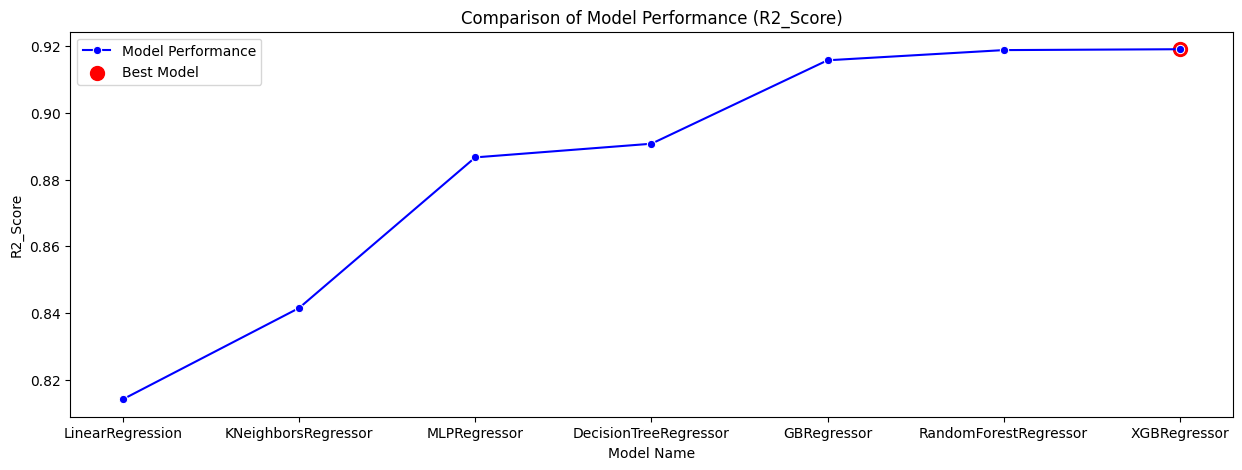

In [576]:

comparison_df = comparison_df.sort_values(by='R2_score', ascending=True)


max_index = comparison_df['R2_score'].idxmax()  # This returns the row index having highest r2_score


plt.figure(figsize=(15, 5))
sns.lineplot(data=comparison_df, x='Model', y='R2_score', marker='o', color='blue', label="Model Performance")


plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'R2_score'],color='red', s=100, label="Best Model")


plt.xlabel("Model Name")
plt.ylabel("R2_Score")

plt.legend()
plt.title("Comparison of Model Performance (R2_Score)")
plt.show()


# 9. CONCLUSION

- From the above lineplot, models such as GBRegressor, XGBRegressor and RandomForestRegressor almost gives similar r2_score which works well with this regression problem compared to other models. 

- Among all the models, 'XGBRegressor' has the highest predictive performance. Therefore, we can infer that 'XGBRegressor' will be the most suitable model for the given dataset.

